### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

### Number of NaN values in each column:

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

### Assign 'unknown' tag to missing data: 

In [5]:
data.fillna('unknown', inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



### Overall coupon acceptance rate:

In [6]:
print('{:.1f}%'.format(100 * np.mean(data['Y'])))

56.8%


5. Use a bar plot to visualize the `coupon` column.

### Coupon type counts:

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

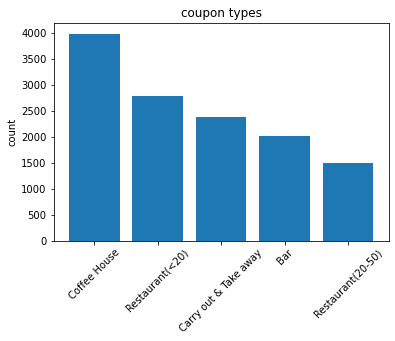

In [7]:
couponCounts = data['coupon'].value_counts()
plt.bar(couponCounts.index, couponCounts)
plt.title('coupon types')
plt.ylabel('count')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

### Histogram of temperatures:

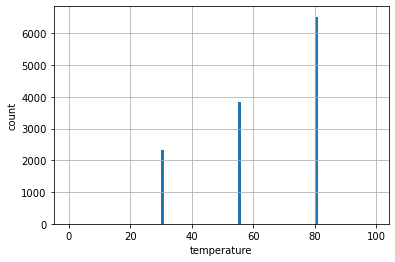

In [8]:
plt.hist(data['temperature'], bins=np.arange(100))
plt.xlabel('temperature')
plt.ylabel('count')
plt.grid()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


### Create bar coupon data frame:

In [9]:
df_barCoupon = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


### Bar coupon acceptance rate:

In [10]:
# overall bar coupon acceptance rate
print('Bar coupon overall acceptance rate:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon['Y'])))

Bar coupon overall acceptance rate:
-> 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


### bar coupon acceptance rate client segment 1

In [11]:
print('Unique occurrences in "Bar" column:')
print(np.unique(df_barCoupon['Bar']))

sel1 = (df_barCoupon['Bar'] == 'never') | \
       (df_barCoupon['Bar'] == 'less1') | \
       (df_barCoupon['Bar'] == '1~3')

sel2 = (df_barCoupon['Bar'] == '4-8') | \
       (df_barCoupon['Bar'] == 'gt8')

print('')
print('Acceptance rate for bar visits 3 or fewer times: {:.1f}%'. \
      format(100 * np.mean(df_barCoupon.loc[sel1, 'Y'])))
print('Acceptance rate for bar visists 4 or more times: {:.1f}%'. \
      format(100 * np.mean(df_barCoupon.loc[sel2, 'Y'])))


Unique occurrences in "Bar" column:
['1~3' '4~8' 'gt8' 'less1' 'never' 'unknown']

Acceptance rate for bar visits 3 or fewer times: 37.1%
Acceptance rate for bar visists 4 or more times: 73.5%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


### bar coupon acceptance rate client segment 2

In [12]:
print('Unique occurrences in "age" column:')
print(np.unique(df_barCoupon['age']))

sel1 = (df_barCoupon['Bar'] == '1~3') | \
       (df_barCoupon['Bar'] == '4~8') | \
       (df_barCoupon['Bar'] == 'gt8') 

sel2 = (df_barCoupon['age'] == '26') | \
       (df_barCoupon['age'] == '31') | \
       (df_barCoupon['age'] == '36') | \
       (df_barCoupon['age'] == '46') | \
       (df_barCoupon['age'] == '50plus') 

print('')
print('Acceptance rate bar visits more than once a month:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel1, 'Y'])))
    
print('')
print('Acceptance rate age over 25:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel2, 'Y'])))

sel = sel1 & sel2
print('')
print('Acceptance rate bar visits more than once a month AND age over 25:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel, 'Y'])))
      
print('')
print('Acceptance rate all others: {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[~sel, 'Y'])))

Unique occurrences in "age" column:
['21' '26' '31' '36' '41' '46' '50plus' 'below21']

Acceptance rate bar visits more than once a month:
-> 68.8%

Acceptance rate age over 25:
-> 37.7%

Acceptance rate bar visits more than once a month AND age over 25:
-> 69.8%

Acceptance rate all others: 34.1%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


### bar coupon acceptance rate client segment 3

In [13]:
print('Unique occurrences in "passanger" column:')
print(np.unique(df_barCoupon['passanger']))

sel1 = (df_barCoupon['Bar'] == '1~3') | \
       (df_barCoupon['Bar'] == '4~8') | \
       (df_barCoupon['Bar'] == 'gt8')

sel2 = (df_barCoupon['passanger'] != 'Kid(s)') & \
       (df_barCoupon['passanger'] != 'Alone') 

sel3 = df_barCoupon['occupation'] != 'Farming Fishing & Forestry'

print('')
print('Acceptance rate bar visit more than once a month:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel1, 'Y'])))

print('')
print('Acceptance rate passenger not a kid:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel2, 'Y'])))

print('')
print('Acceptance rate occupation other than farming, fishing, forestry:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel3, 'Y'])))

sel = sel1 & sel2 & sel3
print('')
print('Acceptance rate for:')
print('- bar visit more than once a month AND')
print('- passenger not a kid AND')
print('- occupation other than farming, fishing, forestry:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel, 'Y'])))

print('')
print('Acceptance rate all others:')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[~sel, 'Y'])))


Unique occurrences in "passanger" column:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Acceptance rate bar visit more than once a month:
-> 68.8%

Acceptance rate passenger not a kid:
-> 48.3%

Acceptance rate occupation other than farming, fishing, forestry:
-> 41.0%

Acceptance rate for:
- bar visit more than once a month AND
- passenger not a kid AND
- occupation other than farming, fishing, forestry:
-> 71.8%

Acceptance rate all others:
-> 37.7%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



### bar coupon acceptance rate client segment 4

In [14]:
sel1 = ( (df_barCoupon['Bar'] == '1~3') | \
         (df_barCoupon['Bar'] == '4~8') | \
         (df_barCoupon['Bar'] == 'gt8') ) & \
       ( (df_barCoupon['passanger'] != 'Kid(s)') & \
         (df_barCoupon['passanger'] != 'Alone') ) & \
       ( df_barCoupon['maritalStatus'] != 'Widowed' )  

sel2 = ( (df_barCoupon['Bar'] == '1~3') | \
         (df_barCoupon['Bar'] == '4~8') | \
         (df_barCoupon['Bar'] == 'gt8') ) & \
       ( (df_barCoupon['age'] == 'below21') | \
         (df_barCoupon['age'] == '21') | \
         (df_barCoupon['age'] == '26') )

sel3 = ( (df_barCoupon['RestaurantLessThan20'] == '4~8') | \
         (df_barCoupon['RestaurantLessThan20'] == 'gt8') ) & \
       ( (df_barCoupon['income'] == 'Less than $12500') | \
         (df_barCoupon['income'] == '$12500 - $24999') | \
         (df_barCoupon['income'] == '$25000 - $37499') | \
         (df_barCoupon['income'] == '$37500 - $49999') )    

print('Acceptance rate for segment 4a')
print('"go to bars more than once a month, had passengers that were not a kid, and were not widowed"')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel1, 'Y'])))

print('')
print('Acceptance rate for segment 4b')
print('"go to bars more than once a month and are under the age of 30"')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel2, 'Y'])))

print('')
print('Acceptance rate for segment 4c')
print('"go to cheap restaurants more than 4 times a month and income is less than 50K"')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel3, 'Y'])))

print('')
print('Acceptance rate for segment 4a OR 4b OR 4c (i.e. using logical ORs):')
sel = sel1 | sel2 | sel3
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[sel, 'Y'])))

print('')
print('Acceptance rate all others, i.e. NOT (4a OR 4b OR 4c) (?):')
print('-> {:.1f}%'.format(100 * np.mean(df_barCoupon.loc[~sel, 'Y'])))



Acceptance rate for segment 4a
"go to bars more than once a month, had passengers that were not a kid, and were not widowed"
-> 71.8%

Acceptance rate for segment 4b
"go to bars more than once a month and are under the age of 30"
-> 72.2%

Acceptance rate for segment 4c
"go to cheap restaurants more than 4 times a month and income is less than 50K"
-> 45.3%

Acceptance rate for segment 4a OR 4b OR 4c (i.e. using logical ORs):
-> 56.9%

Acceptance rate all others, i.e. NOT (4a OR 4b OR 4c) (?):
-> 33.2%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Based on these observations, the following obervations are made:
- drivers who tend to visit bars on a regular basis have higher bar coupon acceptance rates
- drivers with age over 25 have lower bar coupon acceptance rates
- drivers with a passenger that is not a kid have higher bar coupon acceptance rates

Note: With the keyword "OR" inserted in the assignment, it is not entirely clear whether logical ORs across various groups are supposed to be formed.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Create coffee coupon data frame:

In [15]:
df_coffeeCoupon = data[data['coupon'] == 'Coffee House']

In [16]:
print('Overall coffee coupon acceptance rate:')
print('-> {:.1f}%'.format(100 * np.mean(df_coffeeCoupon['Y'])))

Overall coffee coupon acceptance rate:
-> 49.9%


### Coffee coupon acceptance rate across various groups:

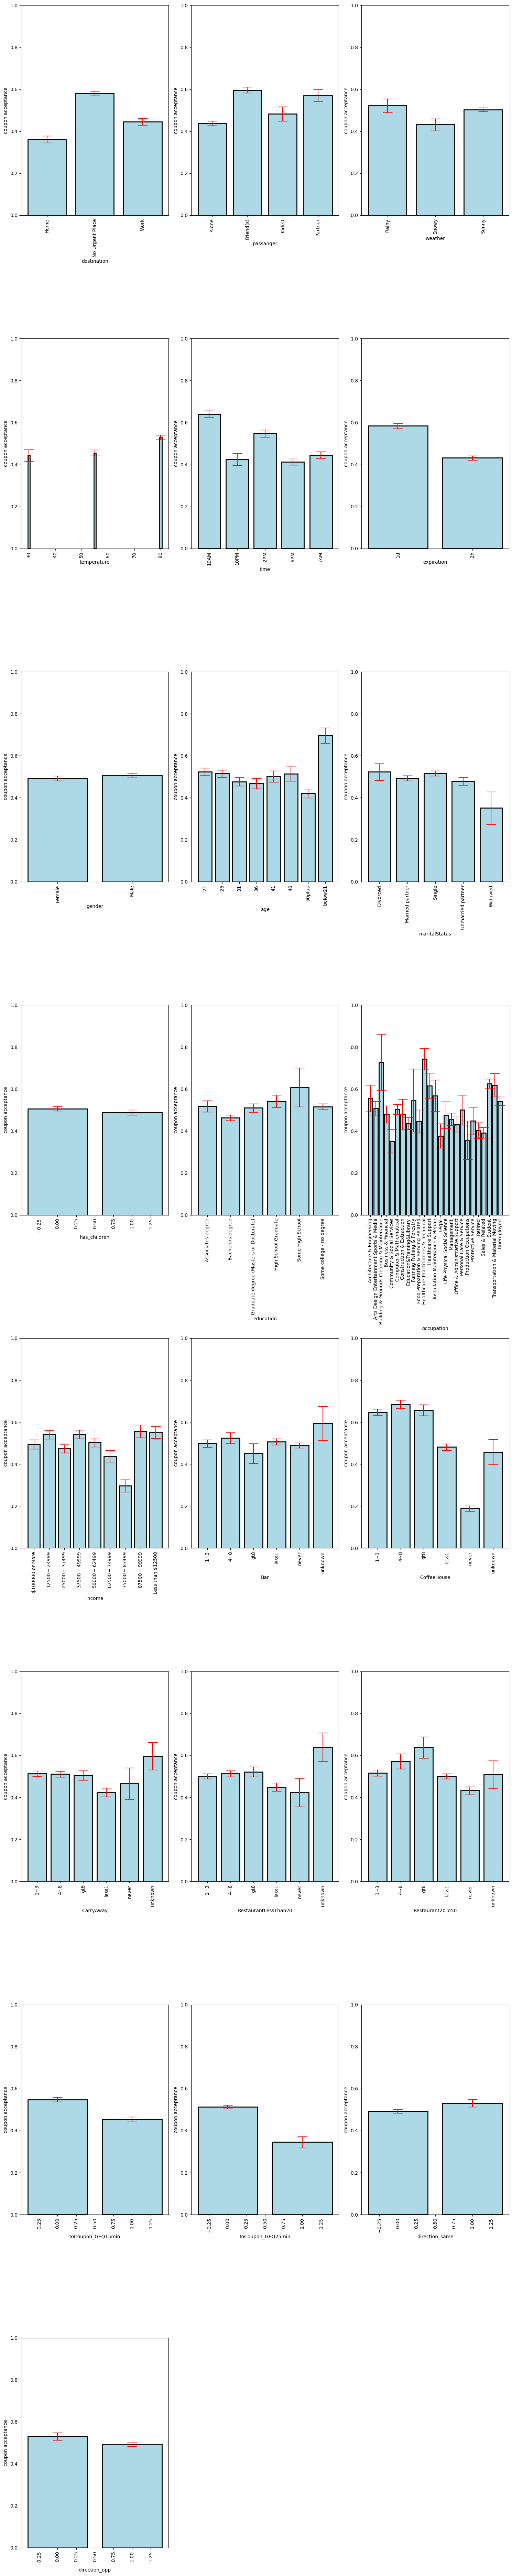

In [17]:
import math
from scipy.stats import bootstrap

# don't consider columns with only a single value or too many unknowns
columns = list(df_coffeeCoupon.columns)
dropColumns = ['car', 'Y', 'toCoupon_GEQ5min', 'coupon']
for col in dropColumns:
    columns.remove(col)
    
nVariables = len(columns)
nCols = 3
nRows = math.ceil(nVariables / nCols)  
plt.figure(dpi=100, figsize=[15, 75])
for (i, column) in enumerate(columns):   
    plt.subplot(nRows, nCols, i + 1)  
    
    df_agg_ = df_coffeeCoupon.groupby(column)[['Y']].mean()
    
    # sample mean confidence interval calculation
    df_agg_['yerr'] = [bootstrap((df_coffeeCoupon.loc[df_coffeeCoupon[column] == columnVal, 'Y'], ), 
                                                      np.mean, confidence_level=0.95).standard_error
                                                      for columnVal in df_agg_.index.dropna() ]       
    
    plt.bar(df_agg_.index, df_agg_['Y'], yerr=df_agg_['yerr'],
            capsize=10, linewidth=2, edgecolor='black', ecolor='red', color='lightblue')    
    
    plt.ylim([0, 1])
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('coupon acceptance')    
        
plt.tight_layout()

In the graphs above, red error bars represent 95% confidence bounds on sample means obtained from bootstrapping.

### Observations

People with high coffee coupon acceptance rates tend to be in the following groups:
- Below 21 years
- No urgent driving destination
- Coupon destination less than 25 minutes away
- One day until coupon expiration
- Visits coffee houses once or more per month

In [18]:
sel = (df_coffeeCoupon['age'] == 'below21') & \
      (df_coffeeCoupon['destination'] == 'No Urgent Place') & \
      (df_coffeeCoupon['toCoupon_GEQ25min'] == 0) & \
      (df_coffeeCoupon['expiration'] == '1d') & \
      ( (df_coffeeCoupon['CoffeeHouse'] == 'gt8') | \
        (df_coffeeCoupon['CoffeeHouse'] == '4~8') | \
        (df_coffeeCoupon['CoffeeHouse'] == '1~3') )   

print('Coffee coupon acceptance rate of people belonging to ALL groups above (i.e. AND-logic):')
print('-> {:.1f}%'.format(100 * np.mean(df_coffeeCoupon.loc[sel, 'Y'])))

print('')
print('Number of people belonging to ALL groups above:')
print('-> {:d}'.format(sum(sel)))


Coffee coupon acceptance rate of people belonging to ALL groups above (i.e. AND-logic):
-> 92.6%

Number of people belonging to ALL groups above:
-> 27
